In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Prelievo dei dati per il clustering. Si userà anche il dataset di test

data = pd.read_excel('.\\Data\\data.xlsx')
test = pd.read_excel('.\\Data\\test.xlsx')
test.columns = map(lambda str: str.strip(), test.columns)
data = data.drop(['DIDA id'], axis='columns')
total_data = pd.concat([data, test], axis= 0)
total_data = total_data.sample(frac=1).reset_index(drop=True)
true_class = total_data['DE'].values #salvo le classi di ogni istanza per dopo
total_data = total_data.drop(['DE'], axis='columns')

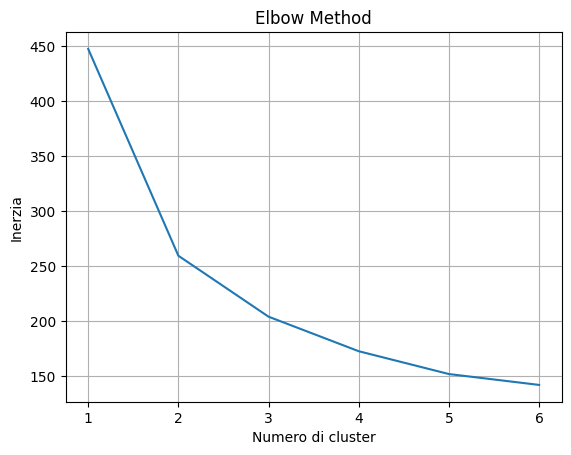

In [4]:
from sklearn.cluster import KMeans

#Selezione del numero ottimale di cluster con Elbow Method

inertia = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state= 16) #creazione degli i centroidi
    kmeans.fit(total_data.values)
    inertia.append(kmeans.inertia_) #append al vettore delle inerzie

plt.grid(True)
plt.plot(range(1,7), inertia)
plt.title("Elbow Method")
plt.xlabel("Numero di cluster")
plt.ylabel("Inerzia")
plt.show() #stampa del grafico dell'inerzia

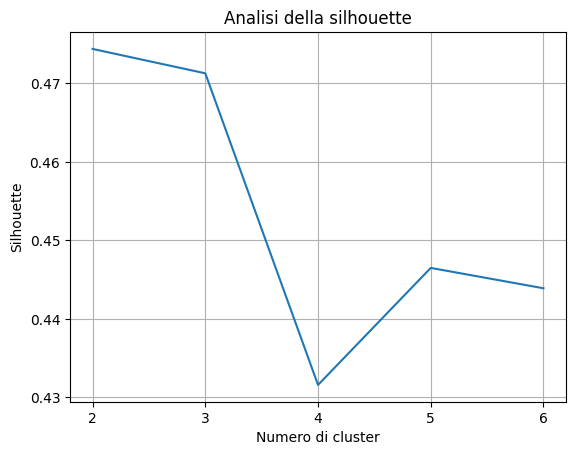

In [5]:
from sklearn.metrics import silhouette_score
import numpy as np

#Selezione del numero ottimale di cluster con Silhouette

silhouette = []
for i in range(2, 7):
     kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state= 16) #creazione degli i centroidi
     cluster_labels = kmeans.fit(total_data.values).labels_ 
     silhouette.append(silhouette_score(total_data.values, cluster_labels)) #append al vettore delle silhouettes

plt.grid(True)
plt.plot(range(2, 7), silhouette)
plt.title("Analisi della silhouette")
plt.xlabel("Numero di cluster") 
plt.ylabel("Silhouette") 
plt.xticks(np.arange(2, 7, step=1))
plt.show() #stampa del grafico della silhouette

Varianza spiegata dalle due componenti selezionate: 0.7613480253771908


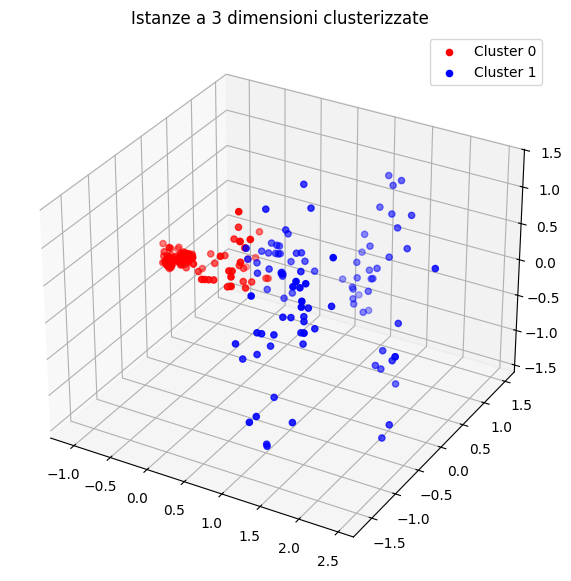

In [9]:
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

kmeans = KMeans(n_clusters=2, init='k-means++', n_init='auto', random_state= 16) #creazione dei due centroidi per il clustering
result = kmeans.fit_predict(total_data.values) 

#PCA per poter visualizzare i dati in 3 dimensioni
pca = PCA(n_components = 3)
pca_data = pca.fit_transform(total_data.values)
print(f'Varianza spiegata dalle due componenti selezionate: {sum(pca.explained_variance_ratio_)}') #varianza spiegata dalle 3 dimensioni ottenute

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[result == 0, 0], pca_data[result == 0, 1], pca_data[result == 0, 2], c='red', label='Cluster 0')
ax.scatter(pca_data[result == 1, 0], pca_data[result == 1, 1], pca_data[result == 1, 2], c='blue', label='Cluster 1')
plt.title('Istanze a 3 dimensioni clusterizzate')
plt.legend()
plt.show() #plot delle istanze a tre dimensioni e del loro relativo cluster di appartenenza
 

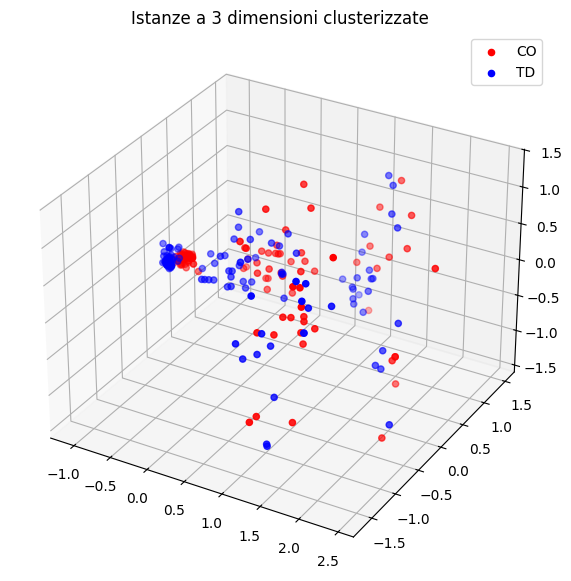

In [10]:
#plot delle istanze a tre dimensioni e della loro relativa vera classe di appartenenza

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[true_class == 0, 0], pca_data[true_class == 0, 1], pca_data[true_class == 0, 2], c='red', label='CO')
ax.scatter(pca_data[true_class == 1, 0], pca_data[true_class == 1, 1], pca_data[true_class == 1, 2], c='blue', label='TD')
plt.title('Istanze a 3 dimensioni clusterizzate')
plt.legend()
plt.show()